# Assignment 2

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn import datasets
import pandas as pd
from sklearn import preprocessing

In [5]:
genes = ['gene' + str(i) for i in range(1, 101)] #features 
wt = ['wt' + str(i) for i in range(1, 6)] #class1
ko = ['ko' + str(i) for i in range(1, 6)] #class2

data = pd.DataFrame(columns = [*wt, *ko], index = genes)

In [6]:
data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
for gene in data.index:
    data.loc[gene, 'wt1' : 'wt5'] = np.random.poisson(lam = random.randrange(10, 1000), size = 5)
    data.loc[gene, 'ko1' : 'ko5'] = np.random.poisson(lam = random.randrange(10, 1000), size = 5)
data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,837,815,771,793,764,215,208,225,208,221
gene2,242,240,222,255,228,742,719,724,737,772
gene3,490,458,448,447,469,315,278,305,296,308
gene4,951,983,959,885,932,942,981,933,924,946
gene5,512,480,507,502,492,705,741,728,783,742


In [14]:
iris = datasets.load_iris()

In [15]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [16]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [17]:
iris_ds = iris['data']

In [19]:
iris_df = pd.DataFrame(data = iris_ds, index = iris['target'], columns = iris['feature_names'])

In [20]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
0,4.9,3.0,1.4,0.2
0,4.7,3.2,1.3,0.2
0,4.6,3.1,1.5,0.2
0,5.0,3.6,1.4,0.2
0,5.4,3.9,1.7,0.4
0,4.6,3.4,1.4,0.3
0,5.0,3.4,1.5,0.2
0,4.4,2.9,1.4,0.2
0,4.9,3.1,1.5,0.1


In [21]:
#standarding the data
scaled_data = preprocessing.scale(iris_df)

In [22]:
scaled_data

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [23]:
pca = PCA()

In [24]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [25]:
pca_data = pca.transform(scaled_data)

In [34]:
#plotting PCA
#per_var is the score of each PC
per_var = np.round(pca.explained_variance_ratio_* 100, decimals = 1)
labels = ['PC'+str(x) for x in range(1, len(per_var) + 1)]

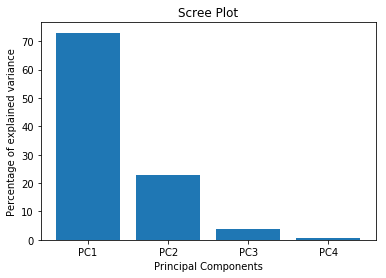

In [35]:
plt.bar(x = range(1, len(per_var) + 1), height = per_var, tick_label = labels)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

In [36]:
per_var

array([73. , 22.9,  3.7,  0.5])

In [42]:
#PCA Plot

In [43]:
pca_df = pd.DataFrame(data = pca_data, index = iris['target'], columns = labels)

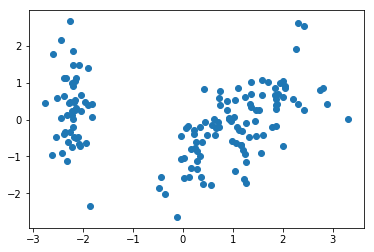

In [44]:
plt.scatter(pca_df.PC1, pca_df.PC2)